In [193]:
import numpy as np

from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import uniform

import random

import matplotlib.pyplot as plt

from scipy.special import digamma
from scipy.special import gamma

In [7]:
a, b = 1.0, 1.0

r = beta.rvs(a, b, size=2)

In [201]:
# alpha is the discount term
# Theta is the usual term in the dirichlet process

def sample_PY(H, alpha, theta, sample_size = 100, disp = False):
    samples = np.zeros(sample_size)
    previous_samples = list()
    clusters = list()
    
    # Number of clusters
    n_k = 0
    for i in range(sample_size):
        # First sample: sample from H
        if i ==0:
            x = H.rvs()
            previous_samples.append(x)
            # Increase the number of clusters
            n_k += 1

        else:
            u = uniform.rvs()
            # With a certain probability, sample from H
            if u < (theta + alpha*n_k)/(i+ theta):
                x = H.rvs()
                
                # Add to the sample list
                previous_samples.append(x)
                
                # Increase the number of clusters
                n_k +=1
                
            # Otherwise, sample for all previous samples
            else:
                x = random.sample(previous_samples, 1)[0]
                previous_samples.append(x)
        # Add to the list of clusters
        clusters.append(n_k)
        
        #For testing purposes
        #print(n_k)
        #print((theta + alpha*n_k)/(i+theta) + (i - alpha*n_k)/(i+theta))
    if disp == True:
        print(n_k, "clusters where generated")
    return np.array(previous_samples), np.array(clusters)
                
                
def expected_value_clusters(alpha, theta, n_samples):
    if alpha == 0:
        return theta*(digamma(np.arange(n_samples)+1 + theta) - digamma(np.ones(n_samples)*theta))
    else:
        return (np.arange(n_samples)+1)**alpha*gamma(theta + 1)/(alpha*gamma(theta + alpha))

def Big_O_estimate(alpha, theta, n_samples):
    if alpha == 0:
        return theta*np.log((np.arange(n_samples)+1))
    else:
        return theta*(np.arange(n_samples)+1)**alpha
            

In [165]:
# No discount
alpha = 0
theta = 1.0
samples, clusters = sample_PY(uniform, alpha, theta, sample_size = 1000)

7 clusters where generated


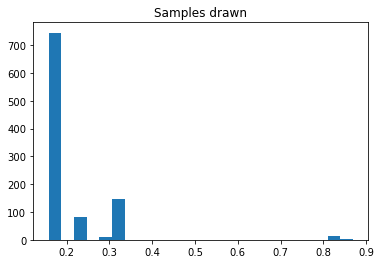

In [166]:
plt.hist(samples, bins = 24)
plt.title("Samples drawn")
plt.show()

# Observing the number of clusters for the regular dirichlet process

In [219]:

alpha = 0
theta = 1.0
sample_size = 10000
cluster_mean = np.zeros(sample_size)
n_iter= 100
for i in range(n_iter):
    samples, clusters = sample_PY(uniform, alpha, theta, sample_size = sample_size)
    cluster_mean += clusters/n_iter


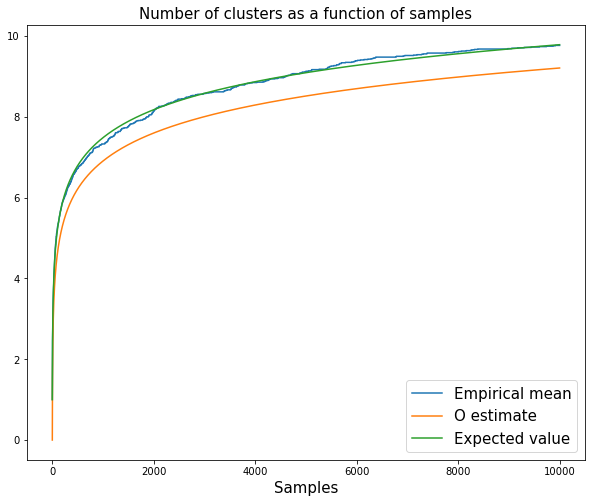

In [220]:
expected = expected_value_clusters(alpha, theta, sample_size)
big_0 = Big_O_estimate(alpha, theta, sample_size)
plt.figure(figsize = (10,8))
plt.plot(cluster_mean, label = "Empirical mean")
plt.plot(big_0, label = "O estimate")
plt.plot(expected,label = "Expected value")
plt.title("Number of clusters as a function of samples", size = 15)
plt.xlabel("Samples", size = 15)
plt.legend(prop={'size': 15})
plt.show()

# Pitman Yor Process

In [221]:
alpha = 0.5
theta = 1.0
sample_size = 10000
cluster_mean = np.zeros(sample_size)
n_iter= 100
for i in range(n_iter):
    samples, clusters = sample_PY(uniform, alpha, theta, sample_size = sample_size)
    cluster_mean += clusters/n_iter


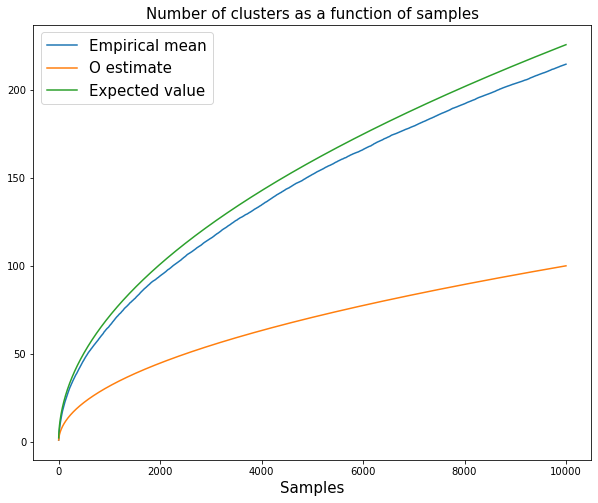

In [222]:
expected = expected_value_clusters(alpha, theta, sample_size)
big_0 = Big_O_estimate(alpha, theta, sample_size)
plt.figure(figsize = (10,8))
plt.plot(cluster_mean, label = "Empirical mean")
plt.plot(big_0, label = "O estimate")
plt.plot(expected,label = "Expected value")
plt.title("Number of clusters as a function of samples", size = 15)
plt.xlabel("Samples", size = 15)
plt.legend(prop={'size': 15})
plt.show()